# Lab 8 - Mean Square Error and validation

We will continue looking at the insurance data set from Lab 7.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold

%matplotlib inline

Load the CSV file into a dataframe and display it.

In [3]:
insurance = pd.read_csv("../data/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## More about dummy variables

Change the `sex`, `smoker`, and `region` columns to dummy variables.

In [5]:
insurance_new = pd.get_dummies(insurance, columns = ["sex","smoker", "region"], drop_first = True)
insurance_new.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


First remember the scatter plot showing the relation being age, smoker and insurance charges:

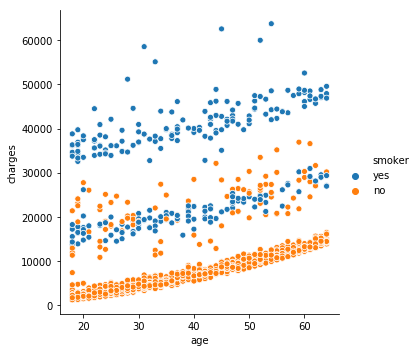

In [9]:
sns.relplot(x = "age", y = "charges", hue = "smoker", data = insurance)

Let's look at a linear model with `age` and `smoker_yes` as the independent variables.

In [8]:
lm = smf.ols("charges ~ age + smoker_yes", data = insurance_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1728.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:59:30   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1335   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2391.6264    528.302     -4.527      0.000   -3428.019   -1355.234
age          274.8712     12.455     22.069      0.000     250.437     299.305
smoker_yes  2.386e+04    433.488     55.031      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      265.239   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.675
Skew:                           1.074   Prob(JB):                    5.59e-139
Kurtosis:                       5.609   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What's the linear model if $X_1$ is age and $X_2$ is smoker_yes?

$$y = -2391.6264 + 274.8712x_1 + 23860x_2$$

Consider all the non-smokers. For these people, what is $x_2$?  So what is the linear model for only non-smokers?

Let's visualize this line.

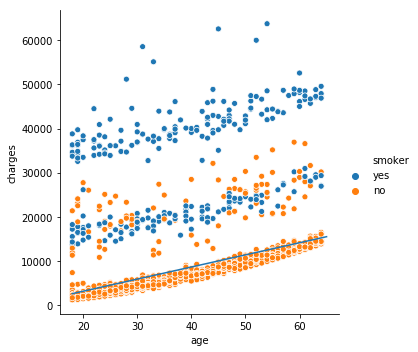

In [16]:
sns.relplot(x = "age", y = "charges", hue = "smoker", data = insurance)
x = np.linspace(18,65,100)
y = -2391.6264 + 274.8712*x
plt.plot(x,y)

Now consider only the smokers.  What is the value of $x_2$?  What is the linear model for the smokers?  

Again, let's visualize the line for the smoker linear model:

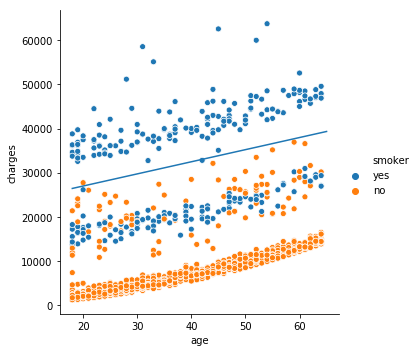

In [17]:
sns.relplot(x = "age", y = "charges", hue = "smoker", data = insurance)
x = np.linspace(18,65,100)
y = (-2391.6264 + 23860) + 274.8712*x
plt.plot(x,y)

Are these the same two linear models we would get if we filtered our data set into smokers and non-smokers and separately computed the linear model for each?

Try it below.

## Mean Squared Error

The error is the difference between the actual $y_i$ value and what was predicted $\hat{y_i}$.  The *mean squared error (MSE)* is the mean of the squares of the error terms:

$$MSE =\frac{\sum_i (y_i - \hat{y_i})^2}{n}$$

While error in linear regression is often measured by the residual sum of squares (RSS), the mean square error is similar, but used to measure error for other methods of prediction.

Let's compute the MSE for the above linear model.  How can you get the error terms?

In [20]:
errors = insurance_new["charges"] - lm.fittedvalues
errors

0       -9801.306989
1        -830.502686
2        -855.304845
3       15305.347835
4       -2537.396389
5       -2372.758803
6       -2011.858591
7        -497.101918
8       -1372.196818
9       14822.492127
10      -1758.832488
11     -10696.966882
12      -2103.567916
13      -1910.442250
14      10726.557224
15       -993.689172
16      -1104.339106
17      -1535.239366
18      -2398.775050
19       7127.652966
20       -871.797843
21      -1704.773217
22      -1419.043986
23       6892.578023
24      -1574.705768
25        175.360193
26       -473.423201
27       -457.656614
28      -1155.218766
29       8726.314781
            ...     
1308     5565.194896
1309    -2002.131262
1310    -2212.053597
1311    -2107.709725
1312    -2417.734960
1313     9711.345011
1314   -10943.938584
1315     8716.276404
1316    -1099.249172
1317    -1392.592286
1318    12267.854024
1319    -1126.649040
1320     -704.357053
1321   -10404.358932
1322    -1669.041465
1323    10888.108036
1324    -1889

In [23]:
squared_errors = errors**2
squared_errors

0       9.606562e+07
1       6.897347e+05
2       7.315464e+05
3       2.342537e+08
4       6.438380e+06
5       5.629984e+06
6       4.047575e+06
7       2.471103e+05
8       1.882924e+06
9       2.197063e+08
10      3.093492e+06
11      1.144251e+08
12      4.424998e+06
13      3.649790e+06
14      1.150590e+08
15      9.874182e+05
16      1.219565e+06
17      2.356960e+06
18      5.754122e+06
19      5.080344e+07
20      7.600315e+05
21      2.906252e+06
22      2.013686e+06
23      4.750763e+07
24      2.479698e+06
25      3.075120e+04
26      2.241295e+05
27      2.094496e+05
28      1.334530e+06
29      7.614857e+07
            ...     
1308    3.097139e+07
1309    4.008530e+06
1310    4.893181e+06
1311    4.442440e+06
1312    5.845442e+06
1313    9.431022e+07
1314    1.197698e+08
1315    7.597347e+07
1316    1.208349e+06
1317    1.939313e+06
1318    1.505002e+08
1319    1.269338e+06
1320    4.961189e+05
1321    1.082507e+08
1322    2.785699e+06
1323    1.185509e+08
1324    3.570

In [24]:
squared_errors.mean()

40826693.69231889

Altogether:

In [26]:
((insurance_new["charges"] - lm.fittedvalues)**2).mean()

40826693.69231889

Let's compare to the mean squared error with all columns as independent variables:

In [27]:
lm2 = smf.ols("charges ~ age + bmi + children + sex_male + smoker_yes + region_northwest + \
                    region_southeast + region_southwest", data = insurance_new).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:30:29   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
((insurance_new["charges"] - lm2.fittedvalues)**2).mean()

36501893.007415496

Look at the p-values to determine which columns to remove from model.  Remove columns one at a time, as the p-values of the other columns will change.

In [30]:
lm3 = smf.ols("charges ~ age + bmi + children +  smoker_yes  + \
                    region_southeast + region_southwest", data = insurance_new).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:36:54   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.217e+04    949.538    -12.812      0.000    -1.4e+04   -1.03e+04
age                257.0064     11.889     21.617      0.000     233.683     280.330
bmi                338.6413     28.554     11.860      0.000     282.625     394.657
children           471.5441    137.656      3.426      0.001     201.498     741.590
smoker_yes        2.384e+04    411.659     57.921      0.000     2.3e+04    2.47e+04
region_southeast  -858.4696    415.206     -2.068      0.039   -1672.998     -43.941
region_southwest  -782.7452    413.756     -1.892      0.059   -1594.430      28.940
==============================================================================
Omnibus:                      300.125   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.587
Skew:                           1.211   Prob(JB):                    2.48e-156
Kurtosis:                       5.643   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Compute the mean squared error:

In [31]:
((insurance_new["charges"] - lm3.fittedvalues)**2).mean()

36521183.493927866

## Training and test sets

Humans learn some things by training (ex. doing homework or practicing a sport or musical instrument), and can check if they know them by testing (ex. test in a university class, a game for a sport, or a performance for a musical instrument).  When you take a test in a math class, say, the questions are different from the ones you practiced on for homework, to ensure you understand the concepts and didn't simply memorize the answers.  We want to test the computer's ability to make a prediction in a similar way.

Therefore, we want to divide our data into *training data* and *test data*.  We will "learn" the linear model on the training data, and then make prediction on the new, previously-unseen test data.

We can use the sci-kit learn package to split up our data.  Notice we are specifying which columns to use as the input data.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(insurance_new[["age","smoker_yes"]], insurance["charges"], test_size=0.2)

Display X_train, X_test, y_train, and y_test below.  Are they what you expect?

In [56]:
X_train.head()

,age,smoker_yes
1003,48,0
292,25,1
269,49,0
228,41,0
938,18,0


In [57]:
y_train.head()

1003    21232.18226
292     42112.23560
269      9282.48060
228      7358.17565
938      2304.00220
Name: charges, dtype: float64

We can also make a linear model with Sci-kit learn:

In [71]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Compute the mean squared error:

In [66]:
((predictions - y_test)**2).mean()

39286899.79340403

Get R-squared:

In [67]:
model.score(X_test, y_test)

0.7034526096487327

What happens if you use a different test size?  Are the scores of the predictions more or less variable?

What happens if you use more columns to make the predictions?  Are the scores of the predictions more or less variable?